In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cpyment import CModel

The Lotka-Volterra model describes interactions between predators (P) and prey (p) populations. It has two states and thus two equations:

$$
\frac{dp}{dt} = \alpha p - \beta p P
$$

$$
\frac{dP}{dt} = \gamma p P -\delta P
$$

The first represents prey growing exponentially in the presence of a sufficient food supply, but losing to predators. The second is predators growing thanks to prey - which are *their* food supply - but decaying otherwise due to starvation or migration. This can be summed up thus as a model with four 'couplings'. Unlike the SIR model, it does not conserve the total population.

In [33]:
model = CModel('Pp')

alpha = 3
beta = 1
gamma = 0.3
delta = 1

model.set_coupling_rate('p:=>p', alpha, 'alpha')
model.set_coupling_rate('p*P:p=>', beta, 'beta')
model.set_coupling_rate('p*P:=>P', gamma, 'gamma')
model.set_coupling_rate('P:P=>', delta, 'delta')

In [44]:
t = np.linspace(0, 10, 1000)
y0 = np.array([2, 10])

trajectory = model.integrate(t, y0)

<IPython.core.display.Javascript object>


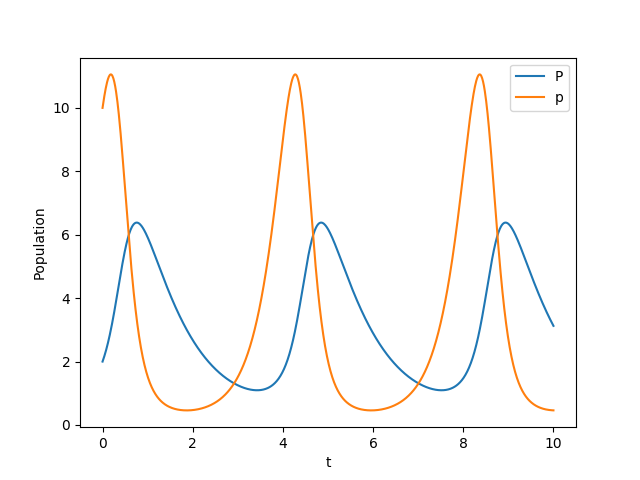

In [45]:
fig, ax = plt.subplots()

ax.set_xlabel('t')
ax.set_ylabel('Population')

for i, l in enumerate('Pp'):
    ax.plot(t, trajectory[:,i], label=l)
    
ax.legend()